# Plots for unit test

In [1]:
host = 'SYNPAI' #'Mac' #'habanero'
if host == 'habanero':
    resultdir = '/rigel/issa/users/Tahereh/Results/'
    
elif host == 'Mac':
    resultdir ='/Users/tahereh/Documents/Results/'
    
elif host == 'SYNPAI':
    resultdir = '/home/tahereh/Documents/Research/Results/Mapping_unit_test/'

In [2]:
import pickle
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as ss
import matplotlib.style as style
style.use('ggplot')

In [17]:
ni, nf, nt = 2000, 20, 46

noise_dist, Collinearity, various_unit_stds, spearman_brown, noisy_map= 'normal', True, True, False, False
reg_methods = ['OMP', 'PLS', 'ridge', 'ridge']
reg_params_list = [[], 10, [10, -10, 10], [10, -10, 10]]
report_popfit = [False, True, True, True]  # [False, True, True]
report_sitefit = [False, False, False, False]  # [True, True, True]
PCA_ncomponents_list = [0,0, 0, 0, 10]

# file = open(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
#     reg_methods, ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')

file = open(resultdir+'unit_test_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
    reg_methods, reg_params_list, PCA_ncomponents_list , ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')

data_list = pickle.load(file)
file.close()
r12,r11,r22,r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list

_

2

/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt


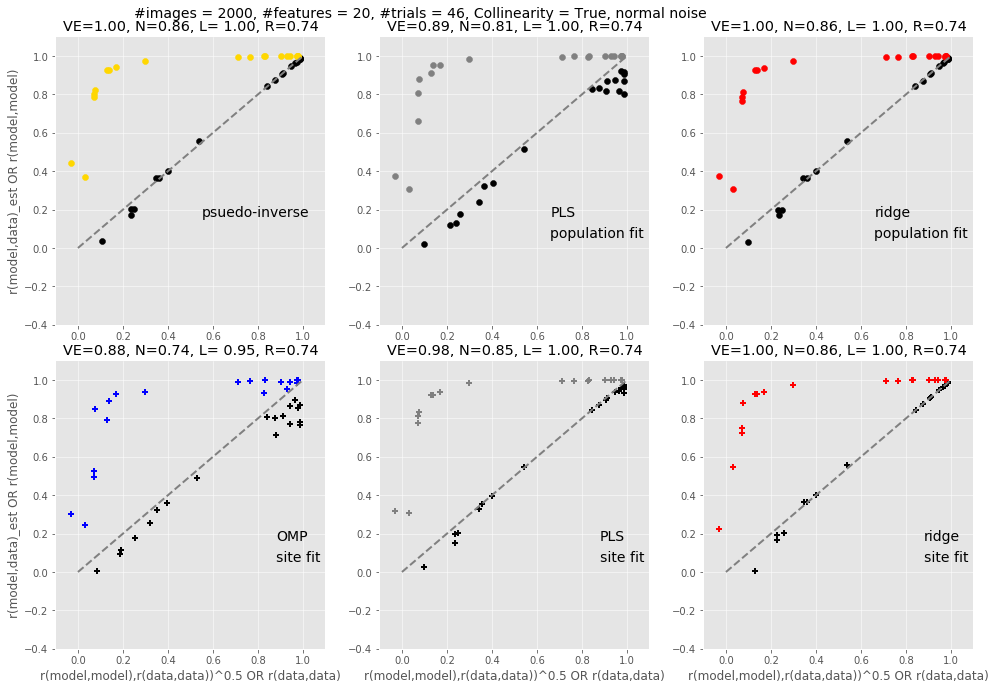

In [18]:
colors = ['b','gray','r']

fig = plt.figure(figsize=[15, 10])
ax0 = fig.add_axes([0.1, 0.05, 0.25, 0.40])
ax1 = fig.add_axes([0.4, 0.05, 0.25, 0.40])
ax2 = fig.add_axes([0.7, 0.05, 0.25, 0.40])
ax3 = fig.add_axes([0.1, 0.5, 0.25, 0.40])
ax4 = fig.add_axes([0.4, 0.5, 0.25, 0.40])
ax5 = fig.add_axes([0.7, 0.5, 0.25, 0.40])

for iax, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.4, 1.1])
    
ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax3.set_ylabel('r(model,data)_est OR r(model,model)')

for iax, ax in enumerate([ax0, ax1, ax2]):
    ax.scatter(np.sqrt(r11_reg_sitfit[:,iax]*r22_reg_sitfit[:,iax]), r12_reg_sitfit[:,iax], color='k',
                    label='Nom. vs. Denom.', marker='+')
    ax.scatter(r22_reg_sitfit[:,iax], r11_reg_sitfit[:,iax], color=colors[iax], label='LHS vs. RHS', marker='+')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    VE = np.nanmedian(r12_reg_sitfit[:,iax]/np.sqrt(r11_reg_sitfit[:, iax]*r22_reg_sitfit[:, iax]))
    N = np.median(r12_reg_sitfit[:, iax])
    L = np.median(r11_reg_sitfit[:, iax])
    R = np.median(r22_reg_sitfit[:, iax])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.8*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'%s'%reg_methods[iax], fontsize=14)
    ax.text(0.8*ax.get_xlim()[1],0.05*ax.get_ylim()[1],'site fit', fontsize=14)
    ax.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

    
    

#ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=16)

#------------------------------
ax3.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color='k', label='Nom. vs. Denom.')
ax3.scatter(r22.mean(1), r11.mean(1), color='gold', label='LHS vs. RHS')
ax3.plot([0, 1], [0, 1], ls='--', color='gray')
ax3.text(0.5*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'psuedo-inverse', fontsize=14)

VE = np.nanmedian(r12/np.sqrt(r11*r22))
N = np.median(r12)
L = np.median(r11)
R = np.median(r22)
ax3.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))

for iax, ax in enumerate([ax4, ax5]):
    ax.scatter(np.sqrt(r11_reg[:,iax+1]*r22_reg[:,iax+1]), r12_reg[:,iax+1], color='k',
                    label='Nom. vs. Denom.')
    ax.scatter(r22_reg[:,iax+1], r11_reg[:,iax+1], color=colors[iax+1], label='LHS vs. RHS')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    
    VE = np.nanmedian(r12_reg[:,iax+1]/np.sqrt(r11_reg[:, iax+1]*r22_reg[:, iax+1]))
    N = np.median(r12_reg[:, iax+1])
    L = np.median(r11_reg[:, iax+1])
    R = np.median(r22_reg[:, iax+1])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.6*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'%s'%reg_methods[iax+1], fontsize=14)
    ax.text(0.6*ax.get_xlim()[1],0.05*ax.get_ylim()[1],'population fit', fontsize=14)

    
#print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
#print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax3.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)



fig.savefig(resultdir+'unit_test_6panels_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)
fig.savefig(resultdir+'unit_test_6panels_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)


In [5]:
purpose_of_this_run = 'ridgeCV10-10-10-sds-1to1-5sites'
#'ridgeCV10-10-10-sds-1to1-5sites'
load_saved_data = True

nf = 20
nc = nf
nt = 46

trainfraci = 0.8  # image trainfrac
splitfract = 0.5  # trial splitfrac
nfoldi = 10
nfoldt = 5
noisy_map = False
various_unit_stds = True
Collinearity = False
noise_dist = 'normal'#'HvM_poisson'  # 'normal'

spearman_brown = False
reg_methods = ['OMP', 'PLS', 'ridge', 'ridge']
reg_params_list = [[], 5, [20, -10, 10], [20, -10, 10]]
report_popfit = [False, True, True, True]  # [False, True, True]
report_sitefit = [False, False, False, False]  # [True, True, True]
PCA_ncomponents_list = [-1, -1, -1, -1, 5]
stats_from_data = False

imag_feat_ratio_list = [1, 2, 4]

VE = np.zeros((len(imag_feat_ratio_list)))
N = np.zeros_like(VE)
L = np.zeros_like(VE)
R = np.zeros_like(VE)

VEstd = np.zeros((len(imag_feat_ratio_list)))
Nstd = np.zeros_like(VE)
Lstd = np.zeros_like(VE)
Rstd = np.zeros_like(VE)

VEarraysite = np.zeros((len(reg_methods), len(imag_feat_ratio_list)))
Narraysite = np.zeros_like(VEarraysite)
Larraysite = np.zeros_like(VEarraysite)
Rarraysite = np.zeros_like(VEarraysite)

VEarraypop = np.zeros_like(VEarraysite)
Narraypop = np.zeros_like(VEarraysite)
Larraypop = np.zeros_like(VEarraysite)
Rarraypop = np.zeros_like(VEarraysite)

VEarraypopStd = np.zeros_like(VEarraysite)
NarraypopStd = np.zeros_like(VEarraysite)
LarraypopStd = np.zeros_like(VEarraysite)
RarraypopStd = np.zeros_like(VEarraysite)

VEarraysiteStd = np.zeros_like(VEarraysite)
NarraysiteStd = np.zeros_like(VEarraysite)
LarraysiteStd = np.zeros_like(VEarraysite)
RarraysiteStd = np.zeros_like(VEarraysite)

for irat, imag_feat_ratio in enumerate(imag_feat_ratio_list):
    
    ni = imag_feat_ratio*nf  # # of features

    # file = open(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
    #     reg_methods, ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')
    
    #file = open(resultdir+'unit_test_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s_statsfromHvM%s.pickle' % (
    #    reg_methods, reg_params_list, PCA_ncomponents_list , ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map,stats_from_data), 'rb')
    
    
    file = open(resultdir + 'unit_test_%s_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_noisymap%s_statsfromHvM%s_%dcmp_%s.pickle' % (
                load_saved_data, reg_methods, reg_params_list, PCA_ncomponents_list, ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data,nc,purpose_of_this_run), 'rb')
    
    print('unit_test_%s_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_noisymap%s_statsfromHvM%s_%dcmp_%s.pickle' % (
                load_saved_data, reg_methods, reg_params_list, PCA_ncomponents_list, ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data,nc,purpose_of_this_run))
    #file = open(resultdir+'unit_test_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_noisymap%s_statsfromHvM%s_%dcmp_%s.pickle' % (
    #        reg_methods, reg_params_list, PCA_ncomponents_list, ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data,nc,purpose_of_this_run), 'rb')
    
    data_list = pickle.load(file)
    file.close()
    r12,r11,r22,r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
    
    VE[irat] = np.nanmedian(r12/np.sqrt(r11*r22))
    N[irat] = np.median(r12)
    L[irat] = np.median(r11)
    R[irat] = np.median(r22)
    
    VEstd[irat] = ss.sem(r12/np.sqrt(r11*r22), axis=None)
    Nstd[irat] = ss.sem(r12, axis=None)
    Lstd[irat] = ss.sem(r11, axis=None)
    Rstd[irat] = ss.sem(r22, axis=None)
    
    for ir, r in enumerate(reg_methods):
        
        VEpop = np.nanmedian(r12_reg[:,ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]))
        Npop = np.median(r12_reg[:, ir])
        Lpop = np.median(r11_reg[:, ir])
        Rpop = np.median(r22_reg[:, ir])
        
        VEarraypop[ir, irat] = VEpop
        Narraypop[ir, irat] = Npop
        Larraypop[ir, irat] = Lpop
        Rarraypop[ir, irat] = Rpop
        
        VEarraypopStd[ir, irat] = ss.sem(r12_reg[:, ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]), axis=None)
        NarraypopStd[ir, irat] = ss.sem(r12_reg[:, ir], axis=None)
        LarraypopStd[ir, irat] = ss.sem(r11_reg[:, ir], axis=None)
        RarraypopStd[ir, irat] = ss.sem(r22_reg[:, ir], axis=None)
        
        VEsite = np.nanmedian(r12_reg_sitfit[:,ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]))
        Nsite = np.median(r12_reg_sitfit[:, ir])
        Lsite = np.median(r11_reg_sitfit[:, ir])
        Rsite = np.median(r22_reg_sitfit[:, ir])
        
        VEarraysite[ir, irat] = VEsite
        Narraysite[ir, irat] = Nsite
        Larraysite[ir, irat] = Lsite
        Rarraysite[ir, irat] = Rsite
        
        VEarraysiteStd[ir, irat] = ss.sem(r12_reg_sitfit[:, ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]), axis=None)
        NarraysiteStd[ir, irat] = ss.sem(r12_reg_sitfit[:, ir], axis=None)
        LarraysiteStd[ir, irat] = ss.sem(r11_reg_sitfit[:, ir], axis=None)
        RarraysiteStd[ir, irat] = ss.sem(r22_reg_sitfit[:, ir], axis=None)
    
    

unit_test_True_['OMP', 'PLS', 'ridge', 'ridge']_[[], 5, [20, -10, 10], [20, -10, 10]]_[-1, -1, -1, -1, 5], ni20_nf20_nt46_collinearityFalse_normal_SBFalse_noisymapFalse_statsfromHvMFalse_20cmp_ridgeCV10-10-10-sds-1to1-5sites.pickle
unit_test_True_['OMP', 'PLS', 'ridge', 'ridge']_[[], 5, [20, -10, 10], [20, -10, 10]]_[-1, -1, -1, -1, 5], ni40_nf20_nt46_collinearityFalse_normal_SBFalse_noisymapFalse_statsfromHvMFalse_20cmp_ridgeCV10-10-10-sds-1to1-5sites.pickle
unit_test_True_['OMP', 'PLS', 'ridge', 'ridge']_[[], 5, [20, -10, 10], [20, -10, 10]]_[-1, -1, -1, -1, 5], ni80_nf20_nt46_collinearityFalse_normal_SBFalse_noisymapFalse_statsfromHvMFalse_20cmp_ridgeCV10-10-10-sds-1to1-5sites.pickle


/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide


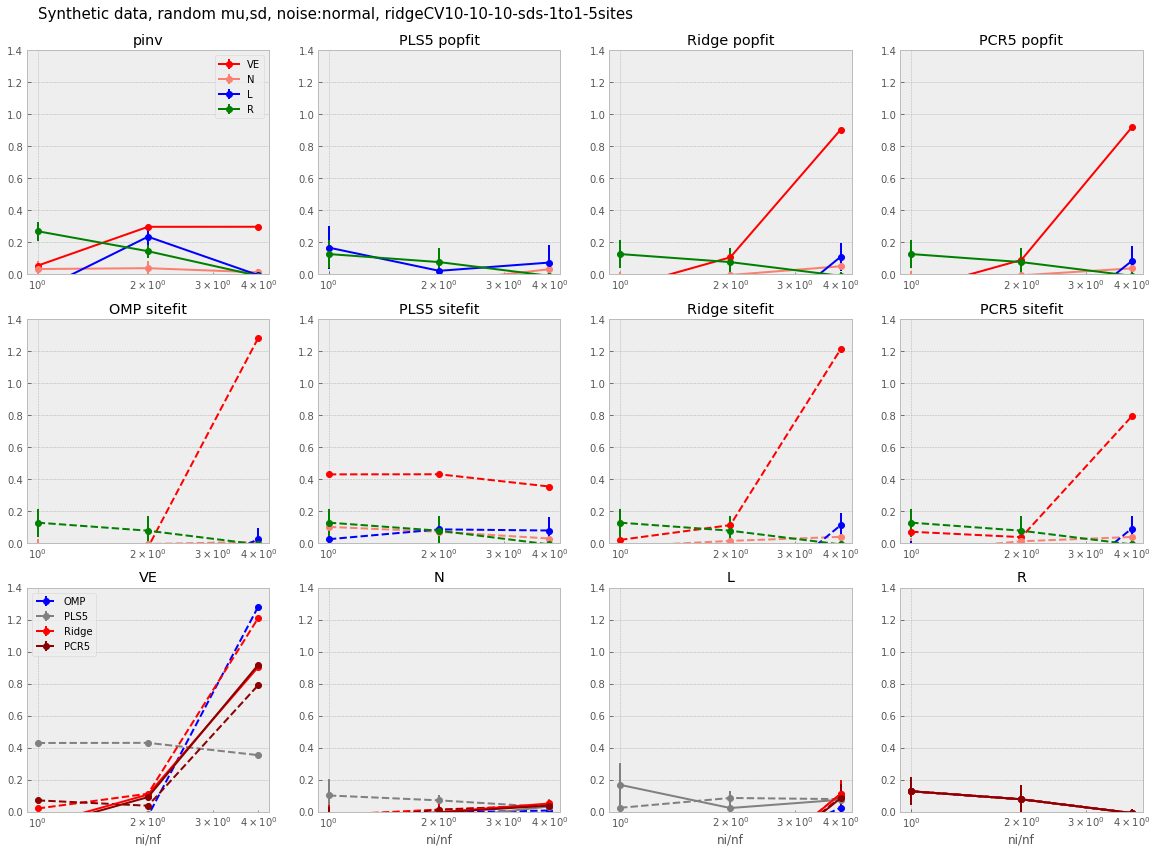

In [25]:
colors = ['b','gray','r','darkred']
style.use('bmh')

reg_methods_labels = ['OMP', 'PLS%d'%reg_params_list[1],'Ridge', 'PCR%d'%PCA_ncomponents_list[-1]]
fig, axes = plt.subplots(nrows=3,ncols=len(reg_methods),figsize=[20, 14])


for iax, ax in enumerate(np.ravel(axes).tolist()):
    ax.set_ylim([-0.0, 1.4])


axes[0, 0].set_xscale("log")
axes[0, 0].errorbar(imag_feat_ratio_list, VE, yerr=VEstd, label='VE', marker='o', color='r')
axes[0, 0].errorbar(imag_feat_ratio_list, N, yerr=Nstd, label='N', marker='o', color='salmon')
axes[0, 0].errorbar(imag_feat_ratio_list, L, yerr=Lstd, label='L', marker='o', color='b')
axes[0, 0].errorbar(imag_feat_ratio_list, R, yerr=Rstd, label='R', marker='o', color='g')

axes[0,0].legend()
axes[0,0].set_title('pinv')

for iax, ax in enumerate(axes[0,1:].tolist()):
    ax.set_xscale("log")
    ax.errorbar(imag_feat_ratio_list, VEarraypop[iax+1,:], yerr=VEarraypopStd[iax+1,:], marker='o', color='r')
    ax.errorbar(imag_feat_ratio_list, Narraypop[iax+1,:], yerr=NarraypopStd[iax+1,:], marker='o', color='salmon')
    ax.errorbar(imag_feat_ratio_list, Larraypop[iax+1,:], yerr=LarraypopStd[iax+1,:], marker='o', color='b')
    ax.errorbar(imag_feat_ratio_list, Rarraypop[iax+1,:], yerr=RarraypopStd[iax+1,:], marker='o', color='g')
    ax.set_title(reg_methods_labels[iax+1]+ ' popfit')
    
    
for iax, ax in enumerate(axes[1, :].tolist()):
    ax.set_xscale("log")
    ax.errorbar(imag_feat_ratio_list, VEarraysite[iax,:], yerr=VEarraysiteStd[iax,:], marker='o', color='r', ls='--')
    ax.errorbar(imag_feat_ratio_list, Narraysite[iax,:], yerr=NarraysiteStd[iax,:], marker='o', color='salmon', ls='--')
    ax.errorbar(imag_feat_ratio_list, Larraysite[iax,:], yerr=LarraysiteStd[iax,:], marker='o', color='b', ls='--')
    ax.errorbar(imag_feat_ratio_list, Rarraysite[iax,:], yerr=RarraysiteStd[iax,:], marker='o', color='g', ls='--')
    ax.set_title(reg_methods_labels[iax] + ' sitefit')
    # ax.set_xlabel('ni/nf')
    
axes[2,0].set_title('VE')
axes[2,0].set_xscale("log")
[axes[2,0].errorbar(imag_feat_ratio_list, VEarraysite[itrace, :], yerr=VEarraysiteStd[itrace, :], marker='o', ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]
axes[2,0].legend()
[axes[2,0].errorbar(imag_feat_ratio_list, VEarraypop[itrace+1, :], yerr=VEarraypopStd[itrace, :], marker='o', color=colors[itrace+1]) for itrace in range(3)]

axes[2,1].set_title('N')
axes[2,1].set_xscale("log")
[axes[2,1].errorbar(imag_feat_ratio_list, Narraysite[itrace, :], yerr= NarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]

[axes[2,1].errorbar(imag_feat_ratio_list, Narraypop[itrace+1, :], yerr=NarraypopStd[itrace+1, :], marker='o', color=colors[itrace+1]) for itrace in range(3)]


axes[2,2].set_title('L')
axes[2,2].set_xscale("log")
[axes[2,2].errorbar(imag_feat_ratio_list, Larraysite[itrace, :], yerr=LarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]

[axes[2,2].errorbar(imag_feat_ratio_list, Larraypop[itrace+1, :], yerr=LarraypopStd[itrace+1, :], marker='o', color=colors[itrace+1]) for itrace in range(3)]

axes[2,3].set_title('R')
axes[2,3].set_xscale("log")
[axes[2,3].errorbar(imag_feat_ratio_list, Rarraysite[itrace, :], yerr=RarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]

[axes[2,3].errorbar(imag_feat_ratio_list, Rarraypop[itrace+1, :], yerr=RarraypopStd[itrace+1, :],  marker='o', color=colors[itrace+1]) for itrace in range(3)]

[ax.set_xlabel('ni/nf') for ax in axes[2, :]]

if stats_from_data:
    title = 'Synthetic data, mu from HvM, noise:%s, %s'%(noise_dist, purpose_of_this_run)
else:
    title = 'Synthetic data, random mu,sd, noise:%s, %s'%(noise_dist, purpose_of_this_run)
axes[0,0].text(1, axes[0,0].get_ylim()[1]+0.2, title, fontsize=15)

fig.savefig(resultdir+'unit_test_summary_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s_statsfromHvM%s_%s.png'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data,purpose_of_this_run ), dpi=300)
fig.savefig(resultdir+'unit_test_summary_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s_statsfromHvM%s_%s.pdf'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data, purpose_of_this_run), dpi=300)


## Plot PLS/PCR over number of components

/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/l

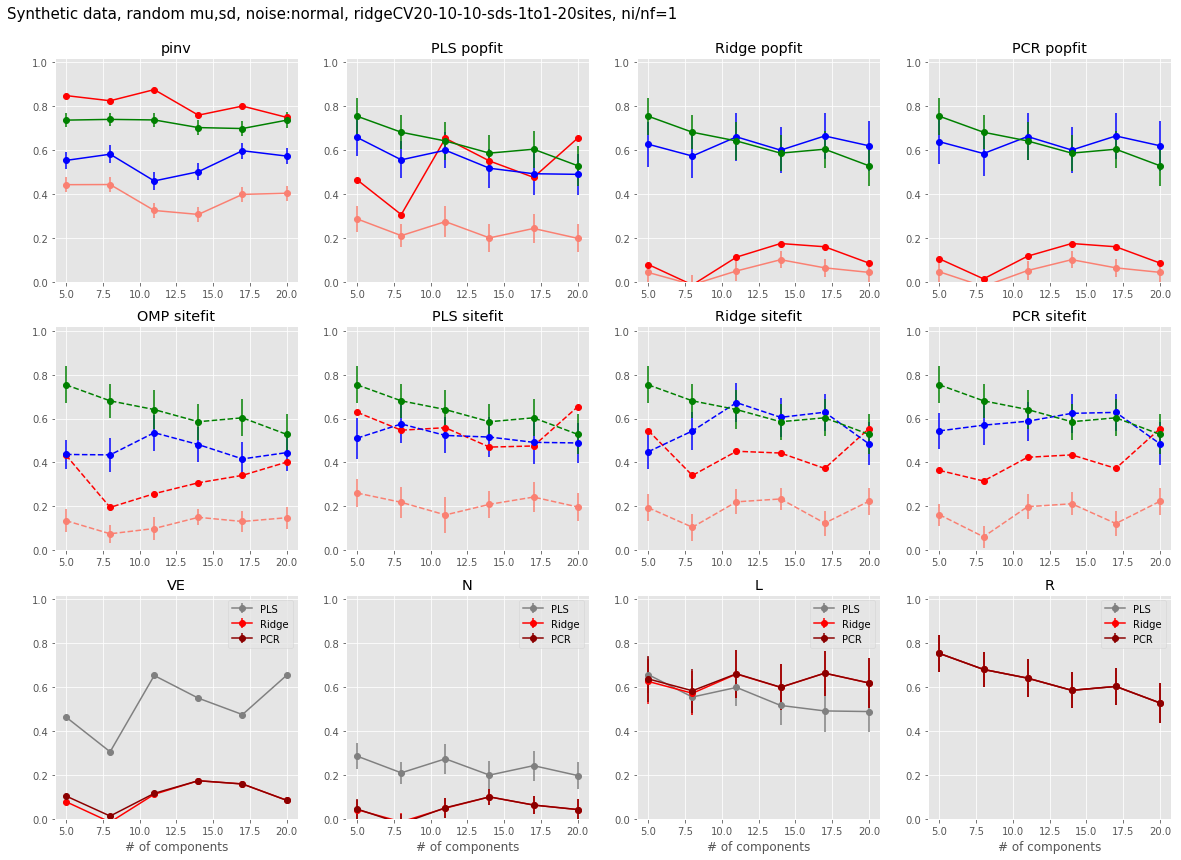

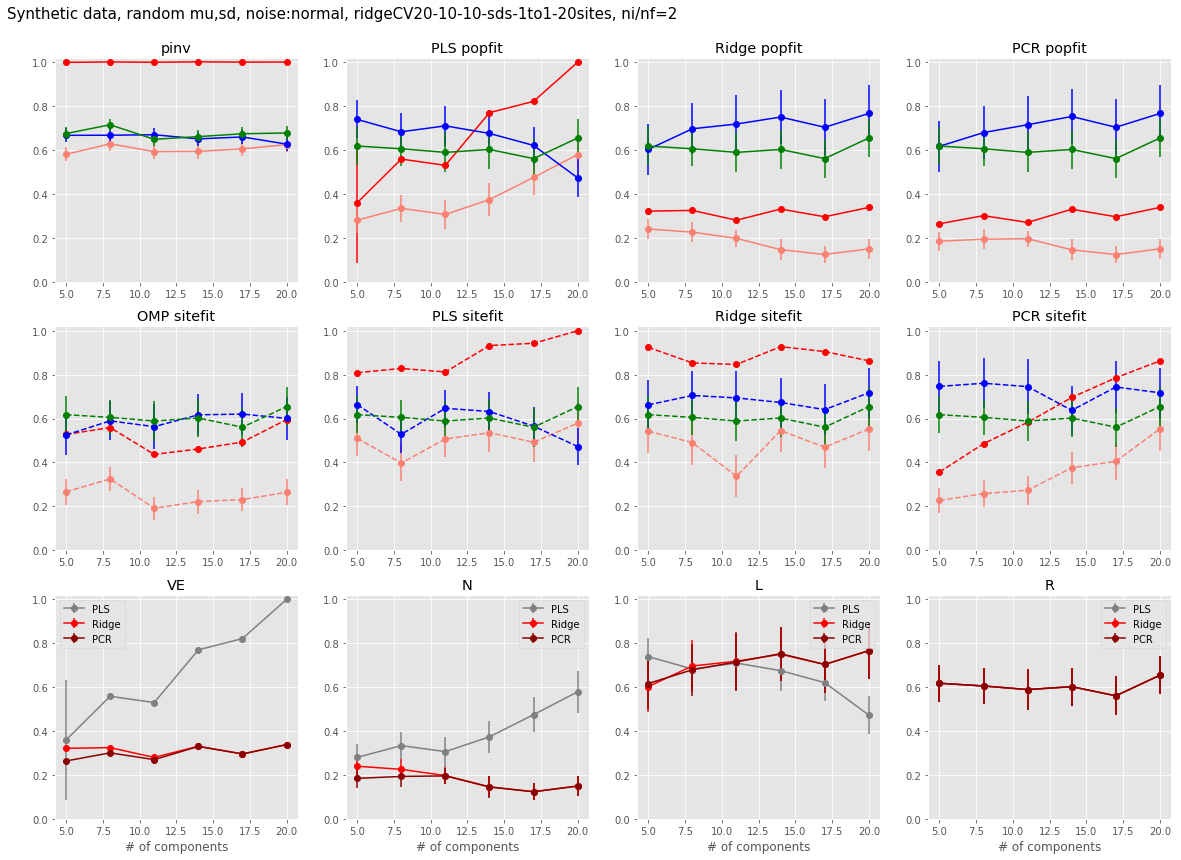

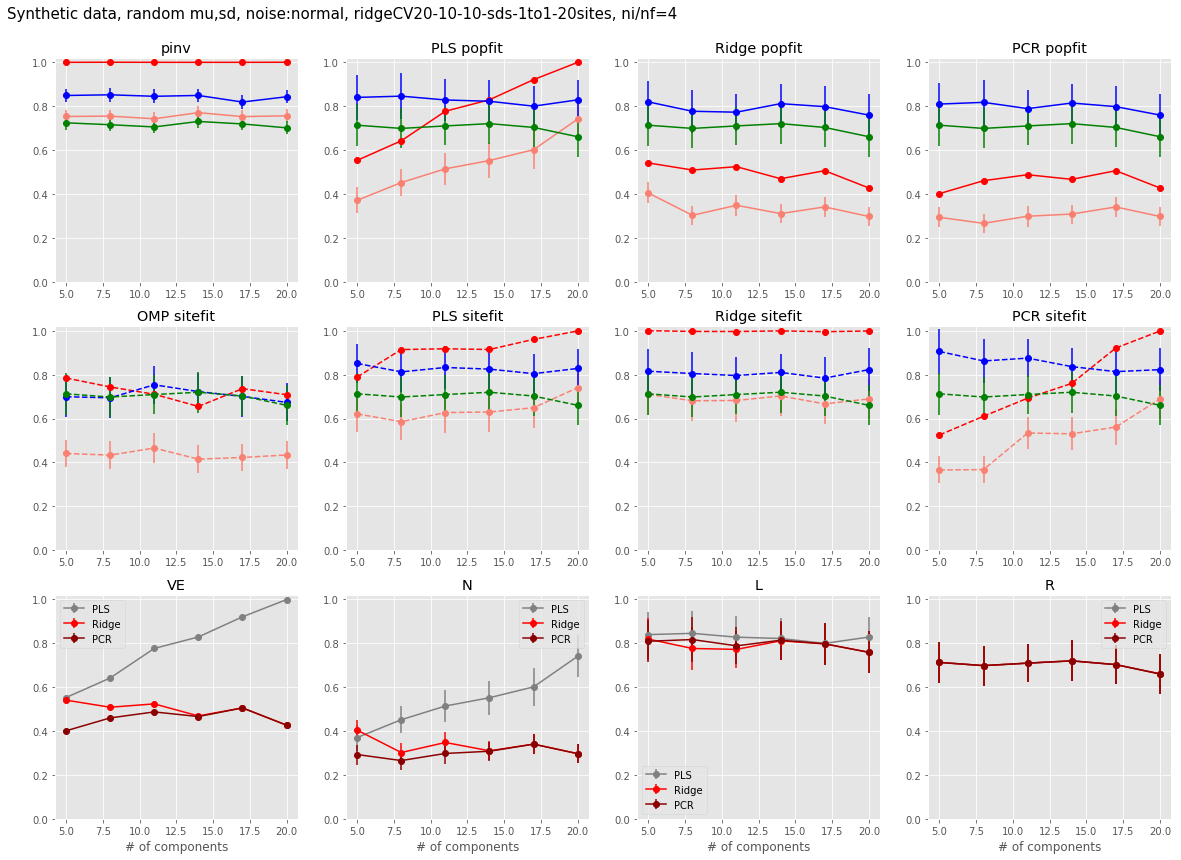

In [13]:
purpose_of_this_run = 'ridgeCV20-10-10-sds-1to1-20sites'
#'ridgeCV10-10-10-sds-1to1-5sites'
load_saved_data = True

nf = 20
nt = 46

imag_feat_ratio_list = [1, 2, 4]
n_components_range = [5, 8, 11,14, 17,20]#np.arange(nf,1,-1)

VE = np.zeros((len(n_components_range),len(imag_feat_ratio_list)))
N = np.zeros_like(VE)
L = np.zeros_like(VE)
R = np.zeros_like(VE)

VEstd = np.zeros((len(n_components_range), len(imag_feat_ratio_list)))
Nstd = np.zeros_like(VE)
Lstd = np.zeros_like(VE)
Rstd = np.zeros_like(VE)

VEarraysite = np.zeros((len(n_components_range), len(reg_methods), len(imag_feat_ratio_list)))
Narraysite = np.zeros_like(VEarraysite)
Larraysite = np.zeros_like(VEarraysite)
Rarraysite = np.zeros_like(VEarraysite)

VEarraypop = np.zeros_like(VEarraysite)
Narraypop = np.zeros_like(VEarraysite)
Larraypop = np.zeros_like(VEarraysite)
Rarraypop = np.zeros_like(VEarraysite)

VEarraypopStd = np.zeros_like(VEarraysite)
NarraypopStd = np.zeros_like(VEarraysite)
LarraypopStd = np.zeros_like(VEarraysite)
RarraypopStd = np.zeros_like(VEarraysite)

VEarraysiteStd = np.zeros_like(VEarraysite)
NarraysiteStd = np.zeros_like(VEarraysite)
LarraysiteStd = np.zeros_like(VEarraysite)
RarraysiteStd = np.zeros_like(VEarraysite)


for inc, nc in enumerate(n_components_range):
    trainfraci = 0.8  # image trainfrac
    splitfract = 0.5  # trial splitfrac
    nfoldi = 10
    nfoldt = 5
    noisy_map = False
    various_unit_stds = True
    Collinearity = False
    noise_dist = 'normal'#'HvM_poisson'  # 'normal'
    
    spearman_brown = False
    reg_methods = ['OMP', 'PLS', 'ridge', 'ridge']
    reg_params_list = [[], nc, [20, -10, 10], [20, -10, 10]]
    report_popfit = [False, True, True, True]  # [False, True, True]
    report_sitefit = [False, False, False, False]  # [True, True, True]
    PCA_ncomponents_list = [-1, -1, -1, -1, nc]
    stats_from_data = False
    
    for irat, imag_feat_ratio in enumerate(imag_feat_ratio_list):
        
        ni = imag_feat_ratio*nf  # # of features
    
        # file = open(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
        #     reg_methods, ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')
        
        # file = open(resultdir+'unit_test_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s_statsfromHvM%s_%dcmp.pickle' % (
        #     reg_methods, reg_params_list, PCA_ncomponents_list , ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map,stats_from_data, nc), 'rb')
        
        file = open(resultdir + 'unit_test_%s_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_noisymap%s_statsfromHvM%s_%dcmp_%s.pickle' % (
                load_saved_data, reg_methods, reg_params_list, PCA_ncomponents_list, ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data,nc,purpose_of_this_run), 'rb')
    
        
        data_list = pickle.load(file)
        file.close()
        r12,r11,r22,r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
        
        VE[inc, irat] = np.nanmedian(r12/np.sqrt(r11*r22))
        N[inc, irat] = np.median(r12)
        L[inc, irat] = np.median(r11)
        R[inc, irat] = np.median(r22)
        
        VEstd[inc, irat] = ss.sem(r12/np.sqrt(r11*r22), axis=None)
        Nstd[inc, irat] = ss.sem(r12, axis=None)
        Lstd[inc, irat] = ss.sem(r11, axis=None)
        Rstd[inc, irat] = ss.sem(r22, axis=None)
        
        for ir, r in enumerate(reg_methods):
            
            VEpop = np.nanmedian(r12_reg[:,ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]))
            Npop = np.median(r12_reg[:, ir])
            Lpop = np.median(r11_reg[:, ir])
            Rpop = np.median(r22_reg[:, ir])
            
            VEarraypop[inc, ir, irat] = VEpop
            Narraypop[inc, ir, irat] = Npop
            Larraypop[inc, ir, irat] = Lpop
            Rarraypop[inc, ir, irat] = Rpop
            
            VEarraypopStd[inc, ir, irat] = ss.sem(r12_reg[:, ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]), axis=None)
            NarraypopStd[inc, ir, irat] = ss.sem(r12_reg[:, ir], axis=None)
            LarraypopStd[inc, ir, irat] = ss.sem(r11_reg[:, ir], axis=None)
            RarraypopStd[inc, ir, irat] = ss.sem(r22_reg[:, ir], axis=None)
            
            VEsite = np.nanmedian(r12_reg_sitfit[:,ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]))
            Nsite = np.median(r12_reg_sitfit[:, ir])
            Lsite = np.median(r11_reg_sitfit[:, ir])
            Rsite = np.median(r22_reg_sitfit[:, ir])
            
            VEarraysite[inc, ir, irat] = VEsite
            Narraysite[inc, ir, irat] = Nsite
            Larraysite[inc, ir, irat] = Lsite
            Rarraysite[inc, ir, irat] = Rsite
            
            VEarraysiteStd[inc, ir, irat] = ss.sem(r12_reg_sitfit[:, ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]), axis=None)
            NarraysiteStd[inc, ir, irat] = ss.sem(r12_reg_sitfit[:, ir], axis=None)
            LarraysiteStd[inc, ir, irat] = ss.sem(r11_reg_sitfit[:, ir], axis=None)
            RarraysiteStd[inc, ir, irat] = ss.sem(r22_reg_sitfit[:, ir], axis=None)


# Plot figures

for irat, imag_feat_ratio in enumerate(imag_feat_ratio_list):
    reg_methods_labels = ['OMP', 'PLS','Ridge', 'PCR']
    colors = ['blue', 'gray','red','darkred']            
    fig, axes = plt.subplots(nrows=3,ncols=len(reg_methods),figsize=[20, 14])
    
    for iax, ax in enumerate(np.ravel(axes).tolist()):
        ax.set_ylim([-0.0, 1.02])
    
    axes[0, 0].errorbar(n_components_range, VE[:, irat], yerr=VEstd[:,irat], label='VE', marker='o', color='r')
    axes[0, 0].errorbar(n_components_range, N[:, irat], yerr=Nstd[:,irat], label='N', marker='o', color='salmon')
    axes[0, 0].errorbar(n_components_range, L[:, irat], yerr=Lstd[:,irat], label='L', marker='o', color='b')
    axes[0, 0].errorbar(n_components_range, R[:, irat], yerr=Rstd[:,irat], label='R', marker='o', color='g')
    if nc == 2:
        axes[0,0].legend()
    axes[0,0].set_title('pinv')

    for iax, ax in enumerate(axes[0,1:].tolist()):
        
        ax.errorbar(n_components_range, VEarraypop[:,iax+1, irat], yerr=VEarraypopStd[:,iax+1, irat], marker='o', color='r')
        ax.errorbar(n_components_range, Narraypop[:,iax+1, irat], yerr=NarraypopStd[:,iax+1, irat], marker='o', color='salmon')
        ax.errorbar(n_components_range, Larraypop[:,iax+1, irat], yerr=LarraypopStd[:,iax+1, irat], marker='o', color='b')
        ax.errorbar(n_components_range, Rarraypop[:,iax+1, irat], yerr=RarraypopStd[:,iax+1, irat], marker='o', color='g')
        ax.set_title(reg_methods_labels[iax+1]+ ' popfit')

    for iax, ax in enumerate(axes[1, :].tolist()):
        
        ax.errorbar(n_components_range, VEarraysite[:,iax,irat], yerr=VEarraysiteStd[:,iax,irat], marker='o', color='r', ls='--')
        ax.errorbar(n_components_range, Narraysite[:,iax,irat], yerr=NarraysiteStd[:,iax,irat], marker='o', color='salmon', ls='--')
        ax.errorbar(n_components_range, Larraysite[:,iax,irat], yerr=LarraysiteStd[:,iax,irat], marker='o', color='b', ls='--')
        ax.errorbar(n_components_range, Rarraysite[:,iax,irat], yerr=RarraysiteStd[:,iax,irat], marker='o', color='g', ls='--')
        ax.set_title(reg_methods_labels[iax] + ' sitefit')
        # ax.set_xlabel('ni/nf')
#         
    axes[2,0].set_title('VE')
    
    #[axes[2,0].errorbar(imag_feat_ratio_list, VEarraysite[itrace, :], yerr=VEarraysiteStd[itrace, :], marker='o', ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]
    if nc == 2:
        axes[2,0].legend()
    [axes[2,0].errorbar(n_components_range, VEarraypop[:, itrace+1, irat], yerr=VEarraypopStd[:, itrace+1, irat], marker='o', color=colors[itrace+1], label=reg_methods_labels[itrace+1]) for itrace in range(3)]

    axes[2,1].set_title('N')
    
    #[axes[2,1].errorbar(imag_feat_ratio_list, Narraysite[itrace, :], yerr= NarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]

    [axes[2,1].errorbar(n_components_range, Narraypop[:, itrace+1, irat], yerr=NarraypopStd[:, itrace+1, irat], marker='o', color=colors[itrace+1], label=reg_methods_labels[itrace+1]) for itrace in range(3)]


    axes[2,2].set_title('L')
    
    #[axes[2,2].errorbar(imag_feat_ratio_list, Larraysite[itrace, :], yerr=LarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]

    [axes[2,2].errorbar(n_components_range, Larraypop[:, itrace+1, irat], yerr=LarraypopStd[:, itrace+1, irat], marker='o', color=colors[itrace+1], label=reg_methods_labels[itrace+1]) for itrace in range(3)]

    axes[2,3].set_title('R')
    
    #[axes[2,3].errorbar(imag_feat_ratio_list, Rarraysite[itrace, :], yerr=RarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(4)]

    [axes[2,3].errorbar(n_components_range, Rarraypop[:, itrace+1, irat], yerr=RarraypopStd[:, itrace+1, irat],  marker='o', color=colors[itrace+1], label=reg_methods_labels[itrace+1]) for itrace in range(3)]

    [ax.set_xlabel('# of components') for ax in axes[2, :]]
    [ax.legend() for ax in axes[2, :]]

    if stats_from_data:
        title = 'Synthetic data, mu from HvM, noise:%s, %s, ni/nf=%d '%(noise_dist, purpose_of_this_run, imag_feat_ratio )
    else:
        title = 'Synthetic data, random mu,sd, noise:%s, %s, ni/nf=%d'%(noise_dist, purpose_of_this_run, imag_feat_ratio )
    axes[0,0].text(1,1.2, title, fontsize=15)
 
    fig.savefig(resultdir+'unit_test_SweepNumComponents_nitonf%d_nt%d_Collin%s_%s_SB%s_%s_statsfromHvM%s_%s.png'%(imag_feat_ratio, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data, purpose_of_this_run), dpi=300)
    fig.savefig(resultdir+'unit_test_SweepNumComponents_nitonf%d_nt%d_Collin%s_%s_SB%s_%s_statsfromHvM%s_%s.pdf'%(imag_feat_ratio, nt, Collinearity, noise_dist, spearman_brown, noisy_map,stats_from_data, purpose_of_this_run), dpi=300)


In [33]:
colors

['blue', 'gray', 'red']

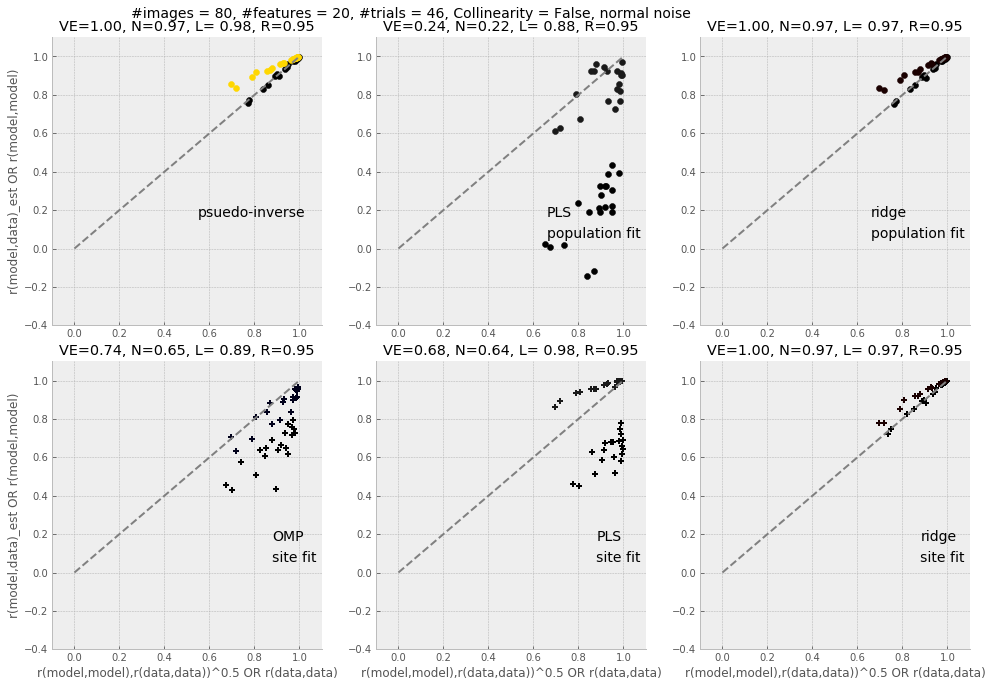

In [23]:
fig = plt.figure(figsize=[15, 10])
ax0 = fig.add_axes([0.1, 0.05, 0.25, 0.40])
ax1 = fig.add_axes([0.4, 0.05, 0.25, 0.40])
ax2 = fig.add_axes([0.7, 0.05, 0.25, 0.40])
ax3 = fig.add_axes([0.1, 0.5, 0.25, 0.40])
ax4 = fig.add_axes([0.4, 0.5, 0.25, 0.40])
ax5 = fig.add_axes([0.7, 0.5, 0.25, 0.40])

for iax, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.4, 1.1])
    
ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax3.set_ylabel('r(model,data)_est OR r(model,model)')

for iax, ax in enumerate([ax0, ax1, ax2]):
    ax.scatter(np.sqrt(r11_reg_sitfit[:,iax]*r22_reg_sitfit[:,iax]), r12_reg_sitfit[:,iax], color='k',
                    label='Nom. vs. Denom.', marker='+')
    ax.scatter(r22_reg_sitfit[:,iax], r11_reg_sitfit[:,iax], color=colors[iax], label='LHS vs. RHS', marker='+')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    VE = np.nanmedian(r12_reg_sitfit[:,iax]/np.sqrt(r11_reg_sitfit[:, iax]*r22_reg_sitfit[:, iax]))
    N = np.median(r12_reg_sitfit[:, iax])
    L = np.median(r11_reg_sitfit[:, iax])
    R = np.median(r22_reg_sitfit[:, iax])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.8*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'%s'%reg_methods[iax], fontsize=14)
    ax.text(0.8*ax.get_xlim()[1],0.05*ax.get_ylim()[1],'site fit', fontsize=14)
    ax.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

    
    

#ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=16)

#------------------------------
ax3.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color='k', label='Nom. vs. Denom.')
ax3.scatter(r22.mean(1), r11.mean(1), color='gold', label='LHS vs. RHS')
ax3.plot([0, 1], [0, 1], ls='--', color='gray')
ax3.text(0.5*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'psuedo-inverse', fontsize=14)

VE = np.nanmedian(r12/np.sqrt(r11*r22))
N = np.median(r12)
L = np.median(r11)
R = np.median(r22)
ax3.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))

for iax, ax in enumerate([ax4, ax5]):
    ax.scatter(np.sqrt(r11_reg[:,iax+1]*r22_reg[:,iax+1]), r12_reg[:,iax+1], color='k',
                    label='Nom. vs. Denom.')
    ax.scatter(r22_reg[:,iax+1], r11_reg[:,iax+1], color=colors[iax+1], label='LHS vs. RHS')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    
    VE = np.nanmedian(r12_reg[:,iax+1]/np.sqrt(r11_reg[:, iax+1]*r22_reg[:, iax+1]))
    N = np.median(r12_reg[:, iax+1])
    L = np.median(r11_reg[:, iax+1])
    R = np.median(r22_reg[:, iax+1])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.6*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'%s'%reg_methods[iax+1], fontsize=14)
    ax.text(0.6*ax.get_xlim()[1],0.05*ax.get_ylim()[1],'population fit', fontsize=14)

    
#print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
#print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax3.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)



fig.savefig(resultdir+'unit_test_6panels_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)
fig.savefig(resultdir+'unit_test_6panels_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)

Text(0.25,1.2,'#images = 80, #features = 20, #trials = 46, Collinearity = False, normal noise')

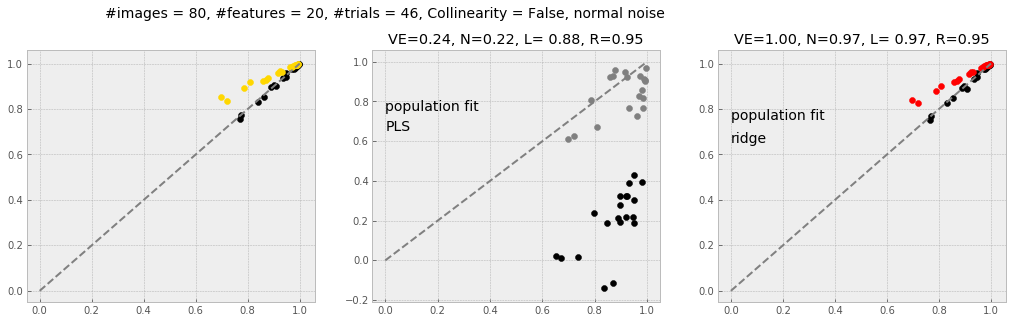

In [24]:

# ----------------------------------------------------------

# if reg_method == 'ridge':
#     color = 'r'
# elif reg_method == 'PLS':
#     color = 'gray'
# elif reg_method == 'OMP':
#     color = 'blue'

colors = ['blue', 'gray', 'red']
reg_methods

color = 'r'
fig = plt.figure(figsize=[16, 5])
ax0 = fig.add_axes([0.1,0.11,0.25,0.70])
ax1 = fig.add_axes([0.4,0.11,0.25,0.70])
ax2 = fig.add_axes([0.7,0.11,0.25,0.70])

ax0.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color='k', label='Nom. vs. Denom.')
ax0.scatter(r22.mean(1), r11.mean(1), color='gold', label='LHS vs. RHS')
ax0.plot([0, 1], [0, 1], ls='--', color='gray')

for iax, ax in enumerate([ax1, ax2]):
    ax.scatter(np.sqrt(r11_reg[:,iax+1]*r22_reg[:,iax+1]), r12_reg[:,iax+1], color='k',
                    label='Nom. vs. Denom.')
    ax.scatter(r22_reg[:,iax+1], r11_reg[:,iax+1], color=colors[iax+1], label='LHS vs. RHS')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    VE = np.nanmedian(r12_reg[:,iax+1]/np.sqrt(r11_reg[:, iax+1]*r22_reg[:, iax+1]))
    N = np.median(r12_reg[:, iax+1])
    L = np.median(r11_reg[:, iax+1])
    R = np.median(r22_reg[:, iax+1])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.0,0.65,'%s'%reg_methods[iax+1], fontsize=14)
    ax.text(0.0,0.75,'population fit', fontsize=14)

    
#print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
#print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)






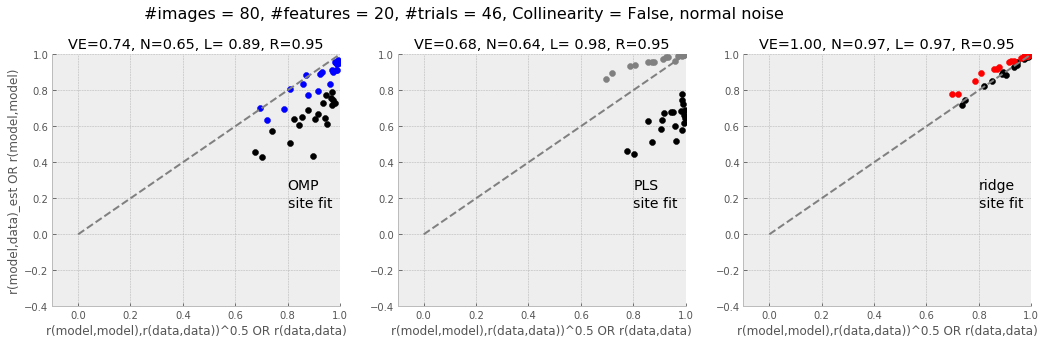

In [25]:
fig = plt.figure(figsize=[16, 5])
ax0 = fig.add_axes([0.1,0.11,0.25,0.70])
ax1 = fig.add_axes([0.4,0.11,0.25,0.70])
ax2 = fig.add_axes([0.7,0.11,0.25,0.70])



for iax, ax in enumerate([ax0, ax1, ax2]):
    ax.scatter(np.sqrt(r11_reg_sitfit[:,iax]*r22_reg_sitfit[:,iax]), r12_reg_sitfit[:,iax], color='k',
                    label='Nom. vs. Denom.')
    ax.scatter(r22_reg_sitfit[:,iax], r11_reg_sitfit[:,iax], color=colors[iax], label='LHS vs. RHS')
    ax.plot([0, 1], [0, 1], ls='--', color='gray')
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([-0.4, 1])
    
    VE = np.nanmedian(r12_reg_sitfit[:,iax]/np.sqrt(r11_reg_sitfit[:, iax]*r22_reg_sitfit[:, iax]))
    N = np.median(r12_reg_sitfit[:, iax])
    L = np.median(r11_reg_sitfit[:, iax])
    R = np.median(r22_reg_sitfit[:, iax])
    ax.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(VE, N, L, R))
    ax.text(0.8*ax.get_xlim()[1],0.25*ax.get_ylim()[1],'%s'%reg_methods[iax], fontsize=14)
    ax.text(0.8*ax.get_xlim()[1],0.15*ax.get_ylim()[1],'site fit', fontsize=14)
    ax.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    
ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=16)


fig.savefig(resultdir+'unit_test_sitfit_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)
fig.savefig(resultdir+'unit_test_sitfit_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(ni, nf, nt, Collinearity, noise_dist, spearman_brown, noisy_map), dpi=300)


In [26]:

if reg_method != 'OMP':
    ax1.scatter(np.sqrt(r11_reg.mean(1)*r22_reg.mean(1)), r12_reg.mean(1), color='k',
                label='Nom. vs. Denom.')
    ax1.scatter(r22_reg.mean(1), r11_reg.mean(1), color=color, label='LHS vs. RHS')
    ax1.plot([0, 1], [0, 1], ls='--', color='gray')

ax2.scatter(np.sqrt(r11_reg_sitfit.mean(1)*r22_reg_sitfit.mean(1)), r12_reg_sitfit.mean(1),
            color='k', marker='x', label='Nom. vs. Denom.')
ax2.scatter(r22_reg_sitfit.mean(1), r11_reg_sitfit.mean(1), color=color, marker='x',
            label='LHS vs. RHS')
ax2.plot([0, 1], [0, 1], ls='--', color='gray')

for ax in [ax0, ax2]:

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], loc='upper left')

ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax1.set_yticks([])
ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                   np.median(r11), np.median(r22)))
ax0.text(0.0, 0.75, 'inversion', fontsize=14)
ax0.text(0.0, 0.71, corr_method_for_inv+'corr', fontsize=14)

if reg_method != 'OMP':
    ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], labels[:2], loc='upper left')
    ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
    ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg),                                                   np.median(r11_reg),np.median(r22_reg)))
else:
    ax1.set_xticks([])
    ax1.axis('off')

    ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)

ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit)))
ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
ax2.text(0.0,0.65,'%s'%reg_method, fontsize=14)

print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit)))

# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)
# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)


NameError: name 'reg_method' is not defined

In [27]:
# ----------------
# Read data
# ----------------
# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True


# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True
# 
# 
# 
# file = open(resultdir+'unit_test_%s_%s_ni%d_nf%d_nt%d_collinearity%s.pickle'%\
#                             (reg_method,reg_params,ni,nf,nt,Collinearity),'rb')
# data_list = pickle.load(file)
# file.close()
# r12,r11,r22,r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
# ----------------------------------------------------------

if reg_method == 'ridge':
    color = 'r'
elif reg_method == 'PLS':
    color = 'gray'
elif reg_method == 'OMP':
    color = 'blue'
    
    
fig = plt.figure(figsize=[12,4])
ax0 = fig.add_axes([0.1,0.11,0.25,0.70])
ax1 = fig.add_axes([0.4,0.11,0.25,0.70])
ax2 = fig.add_axes([0.7,0.11,0.25,0.70])

# ax0 = fig.add_axes([0.1, 0.11, 0.2, 0.70])
# ax1 = fig.add_axes([0.32, 0.11, 0.2, 0.70])
# ax2 = fig.add_axes([0.55, 0.11, 0.2, 0.70])
# ax3 = fig.add_axes([0.77, 0.11, 0.2, 0.70])

for s in range(sd.shape[0]):
    
    ax0.scatter(np.sqrt(r11[s].mean(1)*r22[s].mean(1)), r12[s].mean(1), color = 'k', label ='Nom. vs. Denom.')
    ax0.scatter(r22[s].mean(1), r11[s].mean(1), color=color, label = 'LHS vs. RHS')
    ax0.plot([0, 1], [0, 1], ls='--', color='gray')
    
    if reg_method != 'OMP':
        ax1.scatter(np.sqrt(r11_reg[s].mean(1)*r22_reg[s].mean(1)), r12_reg[s].mean(1), color='k',
                    label='Nom. vs. Denom.')
        ax1.scatter(r22_reg[s].mean(1), r11_reg[s].mean(1), color=color, label='LHS vs. RHS')
        ax1.plot([0, 1], [0, 1], ls='--', color='gray')
    
    ax2.scatter(np.sqrt(r11_reg_sitfit[s].mean(1)*r22_reg_sitfit[s].mean(1)), r12_reg_sitfit[s].mean(1), 
                color='k', marker='x', label='Nom. vs. Denom.')
    ax2.scatter(r22_reg_sitfit[s].mean(1), r11_reg_sitfit[s].mean(1), color=color, marker='x',
                label='LHS vs. RHS')
    ax2.plot([0, 1], [0, 1], ls='--', color='gray')
       
    
for ax in [ax0, ax2]:    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], loc='upper left')


ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax1.set_yticks([])
ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                   np.median(r11), np.median(r22))) 
ax0.text(0.0, 0.75, 'inversion', fontsize=14)

if reg_method != 'OMP':
    ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], labels[:2], loc='upper left')
    ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
    ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)),np.median(r12_reg),\
                                                   np.median(r11_reg),np.median(r22_reg)))
else:
    ax1.set_xticks([])
    ax1.axis('off')
   
    ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22))\
            ,np.median(r12), np.median(r11), np.median(r22))) 
print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg))) 
ax0.text(0.25,1.2,'#images = %d, #features = %d, #trials = %d, Collinearity = %s'%(ni, nf, nt, Collinearity), fontsize=14)

ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit))\
                ,np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit))) 
ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
ax2.text(0.0,0.65,'%s'%reg_method, fontsize = 14)

print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%\
              (np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit))\
            ,np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit))) 

fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_SB%s.png'%(reg_method, ni, nf, nt, Collinearity, spearman_brown), dpi=300)
fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_SB%s.pdf'%(reg_method, ni, nf, nt, Collinearity, spearman_brown), dpi=300)


NameError: name 'reg_method' is not defined

In [28]:
# ----------------
# Read data
# ----------------
# ni,nf,nt = 20, 20, 10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True
# 
# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True
# 
# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True

#
#
# file = open(resultdir+'unit_test_%s_%s_ni%d_nf%d_nt%d_collinearity%s.pickle'%\
#                             (reg_method,reg_params,ni,nf,nt,Collinearity),'rb')
# 
# data_list = pickle.load(file)
# file.close()
# r12, r11, r22, r12_reg, r11_reg, r22_reg, r12_reg_sitfit, r11_reg_sitfit, r22_reg_sitfit = data_list

# ----------------------------------------------------------

if reg_method == 'ridge':
    color = 'r'
elif reg_method == 'PLS':
    color = 'gray'
elif reg_method == 'OMP':
    color = 'blue'

fig = plt.figure(figsize=[12, 5])
ax0 = fig.add_axes([0.1, 0.11, 0.25, 0.70])
ax1 = fig.add_axes([0.4, 0.11, 0.25, 0.70])
ax2 = fig.add_axes([0.7, 0.11, 0.25, 0.70])

ax0.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color = 'k', label ='Nom. vs. Denom.')
ax0.scatter(r22.mean(1), r11.mean(1), color=color, label='LHS vs. RHS')
ax0.plot([0, 1], [0, 1], ls='--', color='gray')

if reg_method != 'OMP':
    ax1.scatter(np.sqrt(r11_reg.mean(1)*r22_reg.mean(1)), r12_reg.mean(1), color='k',
                label='Nom. vs. Denom.')
    ax1.scatter(r22_reg.mean(1), r11_reg.mean(1), color=color, label='LHS vs. RHS')
    ax1.plot([0, 1], [0, 1], ls='--', color='gray')

ax2.scatter(np.sqrt(r11_reg_sitfit.mean(1)*r22_reg_sitfit.mean(1)), r12_reg_sitfit.mean(1),
            color='k', marker='x', label='Nom. vs. Denom.')
ax2.scatter(r22_reg_sitfit.mean(1), r11_reg_sitfit.mean(1), color=color, marker='x',
            label='LHS vs. RHS')
ax2.plot([0, 1], [0, 1], ls='--', color='gray')

for ax in [ax0, ax2]:

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], loc='upper left')

ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax1.set_yticks([])
ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                   np.median(r11), np.median(r22)))
ax0.text(0.0, 0.75, 'inversion', fontsize=14)
ax0.text(0.0, 0.71, corr_method_for_inv+'corr', fontsize=14)

if reg_method != 'OMP':
    ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], labels[:2], loc='upper left')
    ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
    ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg),                                                   np.median(r11_reg),np.median(r22_reg)))
else:
    ax1.set_xticks([])
    ax1.axis('off')

    ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)

ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit)))
ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
ax2.text(0.0,0.65,'%s'%reg_method, fontsize=14)

print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit)))

# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)
# fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)



NameError: name 'reg_method' is not defined